In [2]:
import numpy as np
import matplotlib.pyplot as plt

[10 22  4]


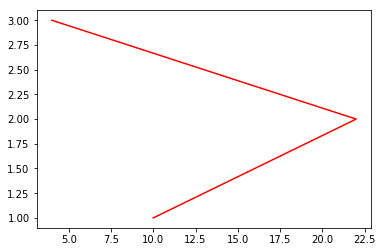

In [3]:
arr = np.asarray([12,2,3,4,4,10, [10,2020]])
arr = np.array([10,22,4])
print(arr)

plt.plot(arr,[1,2,3], color= 'red')

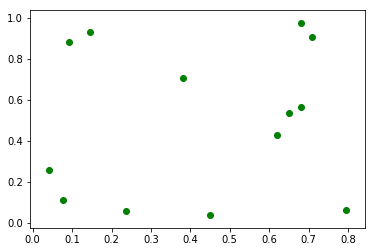

In [4]:
newArr = np.zeros((12,6))
random = np.random.random((13,5))
plt.figure(1)
plt.scatter(random[:, 1], random[:,0], color = 'green')

(100,)
1
(2, 50)
2
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
  48 49]
 [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
  74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
  98 99]]


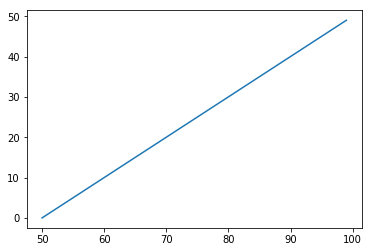

In [52]:
a = np.arange(100)
print(a.shape)
print(a.ndim)
a = a.reshape((2,50))
print(a.shape)
print(a.ndim)
print(a)
plt.figure(2)
plt.plot(a[1], a[0])

In [5]:
a = [[12,3],[0,10], [2,3]]
print(np.shape(a))
print(np.ndim(a))
print(a[1])

(3, 2)
2
[0, 10]


(200, 2)


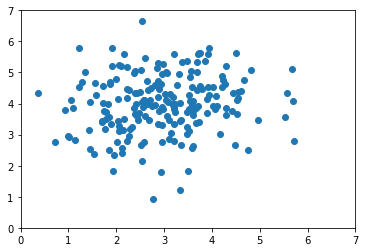

In [81]:
mean_01 = np.array([3.0 , 4.0])

#covariance matrix means how changing the sweetness will affect the color

#covariance matrix be an 2x2 identity matrix 
cov_01 = np.array([[1.0, 0.0], [0.0, 1.0]])

distribution_01 = np.random.multivariate_normal(mean_01, cov_01, 200)
plt.axis([0,7,0,7])
plt.scatter(distribution_01[:, 0], distribution_01[:, 1])
print(distribution_01.shape)

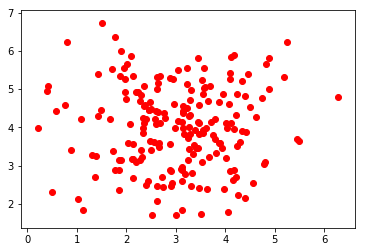

In [14]:
for x in range(distribution_01.shape[0]):
    plt.scatter(distribution_01[x,0], distribution_01[x,1], color = 'red')

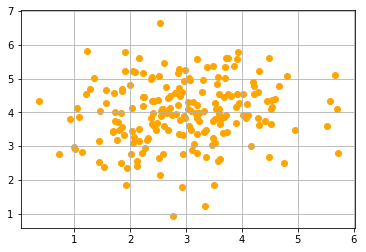

In [82]:
plt.figure('new_figure')
plt.grid()
#we can see that the values are more concetrated at the point (3,4) i.e., 3 is the mean at x-axis == 'sweetness'
#we can see that the values are more concetrated at the point (3,4) i.e., 4 is the mean at y-axis == 'color'
#the distribution is for apples, which have an average color around 4. Which means red. And have a sweetness of mean 3. Which is quite high as compared to lemon


for x in distribution_01:
    plt.scatter(x[0], x[1], color = 'orange')

# all these functions to plot are plotting the same thing
## values of each row of distribution_01 i.e., (x,y)
### 1.
for x in distirbution_01:
    plt.scatter(x[0], x[1], color = 'yellow')
### 2.
for x in range(distirbution_01.shape[0]):
    plt.scatter(distirbution_01[x,0], distirbution_01[x,1], color = 'red')
### 3.
plt.scatter(distirbution_01[:, 0], distirbution_01[:, 1])

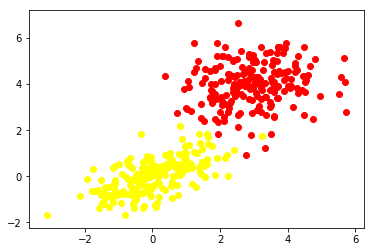

In [83]:
#covariance matrix be an 2x2 identity matrix 

for x in range(distribution_01.shape[0]):
    plt.scatter(distribution_01[x,0], distribution_01[x,1], color = 'red')
    plt.scatter(lemon_distribution[x,0], lemon_distribution[x,1], color = 'yellow')    

## generating the dataset randomly for the lemons
### lemon_mean = [sweetness, color]

In [74]:
lemon_mean = np.array([0.0, 0.0])
lemon_covariance = np.array([[1.0, 0.5], [0.5, 0.6]])
lemon_distribution = np.random.multivariate_normal(lemon_mean, lemon_covariance, 200)
print(lemon_distribution.shape)

(200, 2)


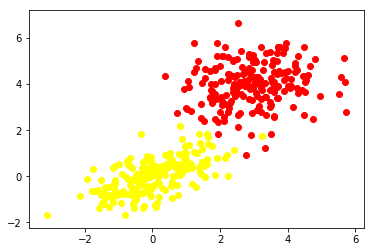

In [121]:
# print(lemon_distribution)
for x in range(lemon_distribution.shape[0]):
    plt.scatter(distribution_01[x,0], distribution_01[x,1], color = 'red')
    plt.scatter(lemon_distribution[x,0], lemon_distribution[x,1], color = 'yellow')    

In [100]:
#labels for apples and lemons
labels = np.zeros((400,1))

#first 200 rows  = 0, means apples
# last 200 rows  = 1, means lemons
labels[200:] = 1

#data_x is our random generated dataset.
data_x = np.zeros((400, 2))

# first 200 rows are having distribution for apples
data_x[:200] = distribution_01
# last 200 rows are having distribution for lemons
data_x[200:] = lemon_distribution

# KNN ALGORITHM

In [ ]:
# we first calculate the distance of the point (query point) from all other points in the space == O(N) for every point
#complexity can be O(Q.N)

In [101]:
#ecludian distance between two points (x1,y1), (x2,y2)
def distance(x1, x2):
    return np.sqrt(((x1 - x2)**2).sum())

In [118]:
# KNN(training_dataset, query_point, training_labels, value_of_neighbours)
#value_of_neighbours shouldn't be too high or too low

def KNN(X_train, query_point, Y_train, k =5):
    vals = []
    
    for ix in range(X_train.shape[0]):
        #v = [distance_from_the_query_point, label_of_the_point i.e., apple or lemon]
        v = [distance(query_point, X_train[ix, :]), Y_train[ix]]
        vals.append(v)
        updated_vals = sorted(vals)
        
        pred_arr = np.asarray(updated_vals[:k])
        pred_arr = np.unique(pred_arr[:, 1], return_counts=True)
        
        #get the largest occurence
        index = pred_arr[1].argmax() #index of largest frequency
        
        return pred_arr[0][index]
    print(vals)

In [120]:
q = np.array([5,4])
KNN(data_x, q, labels)

array([0.])